# Event Triggered Response example use
The following notebook demonstrates an example use case for the `mindscope_utilities.event_triggered_response` function

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mindscope_utilities import event_triggered_response

## Generate some sample data
We'll use a sinusoid embedded in noise

In [2]:
t = np.arange(-10,110,0.01)
data = pd.DataFrame({
    'time': t,
    'sinusoid': np.sin(2*np.pi*t),
    'noisy_sinusoid': np.sin(2*np.pi*t) + 2*np.random.randn(len(t))
})

Visualize 10 seconds of the sample data. The uncorrupted and corrupted sinusoids are shown for reference.

(0.0, 10.0)

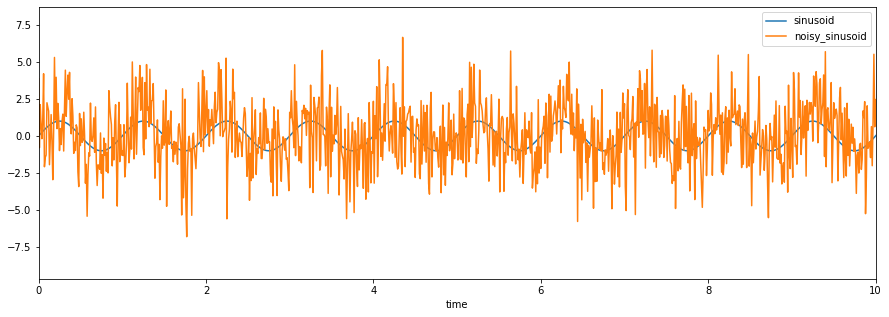

In [3]:
fig, ax = plt.subplots(figsize = (15,5))
data.plot(
    x = 'time',
    y = 'sinusoid',
    ax = ax
)
data.plot(
    x = 'time',
    y = 'noisy_sinusoid',
    ax = ax
)
ax.set_xlim(0, 10)

## Apply the `event_triggered_response` function
We'll take a slice of the noise corrupted sinusoid around points at 1 second intervals.  
Given that the sinusoid has a 1 second period, the average of these slices should look similar to the uncorrupted sinusoid.

In [4]:
etr = event_triggered_response(
    data,
    x = 'time',
    y = 'noisy_sinusoid',
    event_times = np.arange(100),
    t_before = 1,
    t_after = 1,
    step_size = 0.01,
)

Now we can look at the event triggered response

In [5]:
etr

,time,noisy_sinusoid,event_number,event_time
0,-1.00,-0.424091,0,0
1,-0.99,-0.424091,0,0
2,-0.98,1.900756,0,0
3,-0.97,1.747188,0,0
4,-0.96,0.930021,0,0
...,...,...,...,...
20095,0.96,-3.389936,99,99
20096,0.97,-1.474228,99,99
20097,0.98,1.768460,99,99
20098,0.99,0.693309,99,99


## Plot the event triggered response
We'll use seaborn's lineplot function to view the event triggered response. This will display the mean +/- 95% confidence intervals.

<AxesSubplot:xlabel='time', ylabel='noisy_sinusoid'>

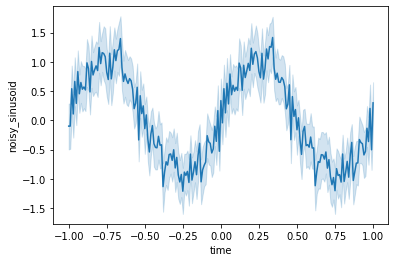

In [6]:
sns.lineplot(
    data = etr,
    x = 'time',
    y = 'noisy_sinusoid',
)